# Forest Fires in Northeastern Portugal

In this project we are going to use meteorological and other data from the Montesinho Natural Park in the northeast region of Portugal to predict wildfire burn area.

The dataset used in this project is from UC Irvine's Machine Learning Repository. As required, here is the citation for the dataset:

P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimaraes, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. Available at: http://www.dsi.uminho.pt/~pcortez/fires.pdf

## Framing the Problem

Forest fires are a natural occurence and in fact necessary for the propagation of many plant species. For example, serotinous cones on some species of conifers will only release their seeds after being heated to a certain temperature. Further, forest fires often function to clear out old organic material and renew the forest for new growth.



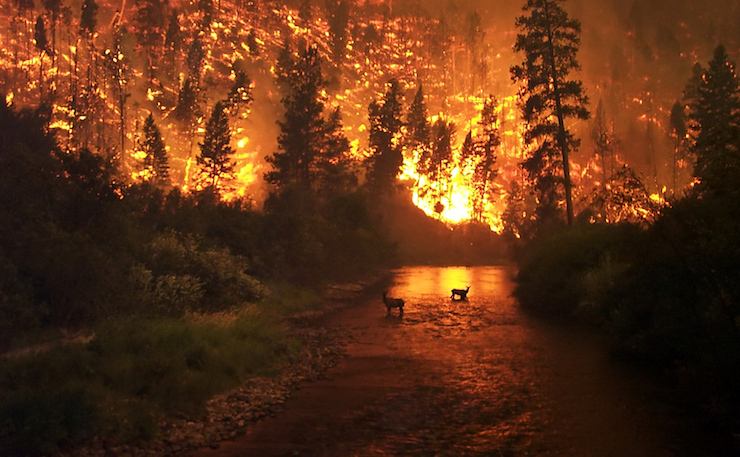
Above: A wildfire burns in the background as some deer look on from the safety of a shallow river.

The severity of forest fires has ballooned in recent years due to factors such as climate change and even, at least in the case of the United States, heavy forest fire suppresion in the 20th century. Climate change has led to longer droughts and higher average temperatures, creating a perfect environment for forest fires to burn out of control.

There is no doubt that the increasing frequency and severity of forest fires also has an effect on the human population--lives are lost and countless developments are destroyed. Additionally, the budgets to supply fire fighting efforts grow every year and yet the fires also grow and cause more damage. 

While most wildfires around the world occur in the western United States they can occure elsewhere too. Portugal is a country which has recently been highly affected by wildfires. The dataset at hand contains information about recent forest fires in the Montesinho Natural Park in the northeast region of Portugal. 

By using machine learning techniques on data about past fires in the Montesinho Natural Park, we can train computers to forecast various characteristics of future fires, thereby enabling better allocation of funding and possible reduction of economic and ecological damage.

The dataset is provided by UC Irvine in their Machine Learning Repository. It compiles 517 instances of wildfires in the park with associated data and meteorological variables. Of particular interest is the area of forest burned by each wildfire. Our aim is to train a machine learning model to predict the burn area. As we are predicting a continuous variable and we already have data to train the model, this will be a supervised regression task. Performance of the model will be measured with a RMSE or MSE function.

## Get the Data

First, let's import the dataset.

In [1]:
import os
import pandas as pd
import folium

FOREST_FIRES_FILENAME = 'forestfires.csv'
    
def load_forest_fire_data(fires_path=FOREST_FIRES_FILENAME):
    csv_path = os.path.join('datasets', fires_path)
    return pd.read_csv(csv_path)

forest_fires = load_forest_fire_data()

Now let's take a quick look at the table.

In [2]:
forest_fires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
forest_fires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [4]:
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


The columns in the dataset represent the following:

    1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
    2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
    3. month - month of the year: "jan" to "dec" 
    4. day - day of the week: "mon" to "sun"
    5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
    6. DMC - DMC index from the FWI system: 1.1 to 291.3 
    7. DC - DC index from the FWI system: 7.9 to 860.6 
    8. ISI - ISI index from the FWI system: 0.0 to 56.10
    9. temp - temperature in Celsius degrees: 2.2 to 33.30
    10. RH - relative humidity in %: 15.0 to 100
    11. wind - wind speed in km/h: 0.40 to 9.40 
    12. rain - outside rain in mm/m2 : 0.0 to 6.4 
    13. area - the burned area of the forest (in ha): 0.00 to 1090.84
    
We can also see from this quick glance that we have no missing values in the table. There are a couple categorical variables, `X`, `Y`, `month`, and `day`.

The location data in the table indicates the grid square in which the fire instance is located, with the park's area being divided into a 9x9 grid:

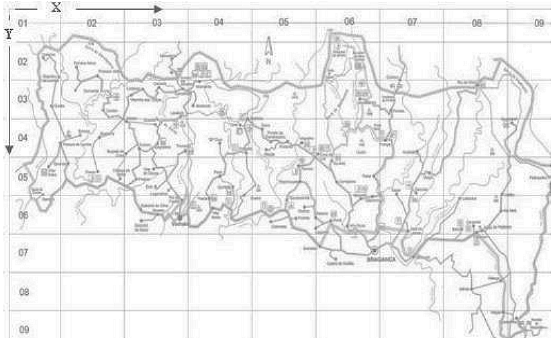

In [18]:
montesinho_coords = (41.90619363929526, -6.859714550272582)
montesinho_park_map = folium.Map(location=list(montesinho_coords), zoom_start=10.45)
folium.Marker(list(montesinho_coords), popup="<i>Montesinho Natural Park</i>").add_to(montesinho_park_map)
montesinho_park_map